In [ ]:

# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)\

# importing dataset using MNIST
# this is how mnist is used mnist contain test and train dataset
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype = np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype = np.int32)

max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]

# displaying dataset using Matplotlib
def display(i):
    img = test_data[i]
    plt.title('label : {}'.format(test_labels[i]))
    plt.imshow(img.reshape((28, 28)))

# img in tf is 28 by 28 px
# fitting linear classifier
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(n_classes = 10,
                                    feature_columns = feature_columns)
classifier.fit(data, labels, batch_size = 100, steps = 1000)

# Evaluate accuracy
classifier.evaluate(test_data, test_labels)
print(classifier.evaluate(test_data, test_labels)["accuracy"])

prediction = classifier.predict(np.array([test_data[0]],
                                         dtype=float),
                                         as_iterable=False)
print("prediction : {}, label : {}".format(prediction,
      test_labels[0]) )

if prediction == test_labels[0]:
     display(0)

AttributeError: ignored

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

11501568/11490434 [==============================] - 0s 0us/step


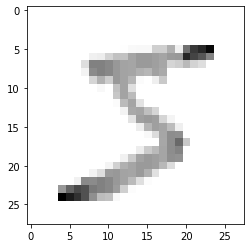

In [ ]:
def draw(n):
    plt.imshow(n,cmap=plt.cm.binary)
    plt.show()

draw(x_train[0])

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
#reshape

model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(x_train,y_train,epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2557 - acc: 0.9251
Epoch 2/3
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1018 - acc: 0.9688
Epoch 3/3
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0696 - acc: 0.9788


label ->  4
prediction ->  4


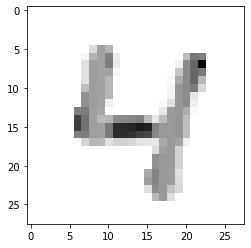

In [ ]:
predictions=model.predict([x_test])
print('label -> ',y_test[56])
print('prediction -> ',np.argmax(predictions[56]))

draw(x_test[56])

In [ ]:
#saving the model
# .h5 or .model can be used

model.save('epic_num_reader.h5')

In [ ]:
new_model = tf.keras.models.load_model('epic_num_reader.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


label ->  1
prediction ->  1


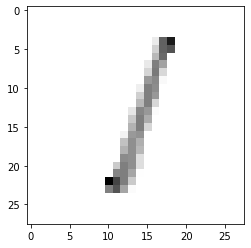

In [ ]:
predictions=new_model.predict([x_test])


print('label -> ',y_test[2])
print('prediction -> ',np.argmax(predictions[2]))

draw(x_test[2])